In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import sqrt, arange
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

student = pd.read_csv("~/Classes/Packt_Data_Analysis/data/data/student/student.csv", sep=";")

student.rename(columns={'sex':'gender'}, inplace=True)
student['alcohol_index'] = (5 * student['Dalc'] + 2 * student['Walc'])/7

# Alcohol consumption level
student['acl'] = student['alcohol_index'] <= 2
student['acl'] = student['acl'].map({True: 'Low', False: 'High'})

### Null Hypothesis Testing framework

**1. Setting up two competing hypotheses** - Each hypothesis test includes two hypothesis about the population.  One is the null hypothesis, notated as Ho, which is a statement of a particular parameter value.  This hypothesis is assumed to be true until there is evidence to suggest otherwise.  The second hypothesis is called the alternative, or research, hypothesis, notated as Ha.  The alternative hypothesis is a statement of a range of alternative values in which the parameter may fall.  One must also check that any assumptions (conditions) needed to run the test have been satisfied e.g. normality of data, independence, and number of success and failure outcomes.

**2. Set in advanced some level of significance, called alpha.**  This value is used as a probability cutoff for making decisions about the null hypothesis.  As we will learn later, this alpha value represents the probability we are willing to place on our test for making an incorrect decision in regards to rejecting the null hypothesis.  The most common alpha value is 0.05  or 5%. Other popular choices are 0.01 (1%) and  0.1 (10%).

**3. Calculate a test statistic and the p-value (or find rejection region)** Gather sample data and calculate a test statistic where the sample statistic is compared to the parameter value.  The test statistic is calculated under the assumption the null hypothesis is true, and incorporates a measure of standard error and assumptions (conditions) related to the sampling distribution.  Such assumptions could be normality of data, independence, and number of success and failure outcomes. A p-value is found by using the test statistic to calculate the probability of the sample data producing such a test statistic or one more extreme.  The rejection region is found by using alpha to find a critical value; the rejection region is the area that is more extreme than the critical value.

**4. Make a test decision about the null hypothesis -**  In this step we decide to either reject the null hypothesis or decide to fail to reject the null hypothesis.  Notice we do not make a decision where we will accept the null hypothesis. 

**5. State an overall conclusion -** Once we have found the p-value or rejection region, and made a statistical decision about the null hypothesis (i.e. we will reject the null or fail to reject the null).  Following this decision, we want to summarize our results into an overall conclusion for our test.

<h2>Some Statistical test from <code>scipy.stats</code></h2>

* kurtosistest(a[, axis, nan_policy])	Tests whether a dataset has normal kurtosis
* normaltest(a[, axis, nan_policy])	Tests whether a sample differs from a normal distribution.
* skewtest(a[, axis, nan_policy])	Tests whether the skew is different from the normal distribution.
* pearsonr(x, y)	Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.
* ttest_1samp(a, popmean[, axis, nan_policy])	Calculates the T-test for the mean of ONE group of scores.
* ttest_1samp(a, popmean[, axis, nan_policy])	Calculates the T-test for the mean of ONE group of scores.
* ttest_ind(a, b[, axis, equal_var, nan_policy])	Calculates the T-test for the means of two independent samples of scores.
* ttest_ind_from_stats(mean1, std1, nobs1, ...)	T-test for means of two independent samples from descriptive statistics.
* ttest_rel(a, b[, axis, nan_policy])	Calculates the T-test on TWO RELATED samples of scores, a and b.
* kstest(rvs, cdf[, args, N, alternative, mode])	Perform the Kolmogorov-Smirnov test for goodness of fit.
* chisquare(f_obs[, f_exp, ddof, axis])	Calculates a one-way chi square test.
* ansari(x, y)	Perform the Ansari-Bradley test for equal scale parameters
* bartlett(*args)	Perform Bartlett’s test for equal variances
* levene(*args, **kwds)	Perform Levene test for equal variances.
* shapiro(x[, a, reta])	Perform the Shapiro-Wilk test for normality.
* anderson(x[, dist])	Anderson-Darling test for data coming from a particular distribution
* anderson_ksamp(samples[, midrank])	The Anderson-Darling test for k-samples.


## Are the population variances equal in the two groups of students (Low vs. High alcohol consumption)?

Let's perform the Bartetts's test whose Null Hypothesis is that the variances are equal. We will use a significance level of 5.0%

In [3]:
student.groupby('acl')['G3'].var()

acl
High    11.151406
Low      9.765917
Name: G3, dtype: float64

In [4]:
grades_low_acl = student['G3'][student['acl'] == 'Low']
grades_high_acl = student['G3'][student['acl'] == 'High']
stats.bartlett(grades_low_acl, grades_high_acl)

BartlettResult(statistic=1.1025085913378183, pvalue=0.29371623181175127)

According to the test we **cannot** reject the Null hypothesis of equal variances, so we will assume that the two groups are samples from a population with the same variances. This nomination will be usefull in our next test.

## Does alcohol consumption affect academic performance?

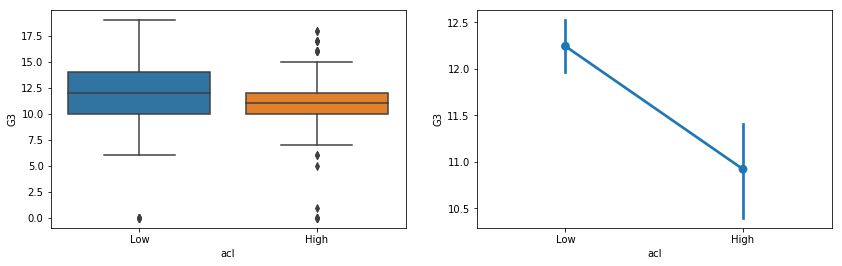

In [5]:
fig, axes = plt.subplots(1, 2, figsize = (14, 4))
sns.boxplot(x = 'acl', y = 'G3', data = student, ax = axes[0])
sns.pointplot(x = 'acl', y = 'G3', data = student, ax = axes[1]); 

The visualizations sugest there is a difference between the means of the final grade of the two groups. Now we will perform a formal statistical test to confirm the hypothesis that students with High alcohol consumption level perform worse than the students with Low alcohol consumption level.

> **Null Hypothesis: for both groups (High and Low ACL) the population means of the final grade are equal.**

>  **Alternative Hypothesis: The population means of the final grades are different.**

A common test to apply in for these cases is the two-sample t-test, which is used to determine if two population means are equal. 

All statistical tests have assumptions that must be checked for their conclusions to be valid, for these test the assumptions are:

1. **Independent samples**: we will assume that the method for collecting the data assured that the answers given by the students are independent.
2. **Large enough sample size or observations come from a normally-distributed population**: this assumption is required if we are working with small samples (less than 30), since in the smaller group we have 166 observations we can say that we have a "large enough" sample.
3. **Variances are equal**

In addition this test have two versions: one assuming equal variances and the other assumming unequal variances.

According to the test we can not reject the Null hypothesis of equal variances, so we will assume that the two samples come from a population with the same population variances. Time to perform our t-test.

In [7]:
stats. ttest_ind(grades_low_acl, grades_high_acl, equal_var = True)

Ttest_indResult(statistic=4.621320706949354, pvalue=4.603608830369269e-06)

Since we got such a low p-value we can reject the Null hypothesis of equal means for the two groups at a level of significance of 5%.

> **Conclusion: there is a statistical significant difference between the grades in the two analyzed groups, since the mean for the group with high alcohol consumption is less than the mean of the other group, the results suggest that alcohol consumption has a negative impact on students' academic performance.**